<a href="https://colab.research.google.com/github/psst54/startTensorflow/blob/master/weekly/3_1_FashionMNIST_wCNN%26ImageAugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


http://adventuresinmachinelearning.com/keras-tutorial-cnn-11-lines/ 의 모델을 사용함.

In [1]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# 데이터 정규화
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

4423680/4422102 [==============================] - 0s 0us/step


In [2]:
# 이미지 보강법을 이용한다.
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

image_generator = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.10,
    shear_range=0.5,
    width_shift_range=0.10,
    height_shift_range=0.10,
    horizontal_flip=True,
    vertical_flip=False
)
"""
rotation_range=10
    0도에서 10도 사이의 임의의 각도로 회전시킨 이미지를 얻을 수 있다.
zoom_range=0.1
    0.9~1.1 사이의 범위로 확대 또는 축소시킨 이미지를 얻을 수 있다.
shear_range=0.5
    0.5 라디안 사이로 밀린 이미지를 얻을 수 있다. 
width_shift_range=0.1
    (전체 넓이의 비율)*0.1 내로 좌우 이동된 이미지를 얻을 수 있다.
height_shift_range=0.1
    (전체 넓이의 비율)*0.1 내로 상하 이동된 이미지를 얻을 수 있다.
horizontal_flip=True
    수평방향으로 뒤집힌 이미지를 얻을 수 있다.
vertical_flip=False
    수직방향으로 뒤집힌 이미지를 얻을 수 있다. 여기에서는 이용하지 않는다.
"""

augment_size = len(x_train)
# x_train의 원소 수만큼 보강된 이미지를 만든다.

randidx = np.random.randint(x_train.shape[0], size=augment_size)
# 랜덤한 인덱스를 augment_size만큼 생성한다.

x_augmented = x_train[randidx].copy()
y_augmented = y_train[randidx].copy()

x_augmented = image_generator.flow(x_augmented, np.zeros(augment_size), batch_size=augment_size, shuffle=False).next()[0]
# flow는 image_generator 함수를 통해서 보강된 이미지를 만드는 역할을 한다.

x_train = np.concatenate((x_train, x_augmented))
y_train = np.concatenate((y_train, y_augmented))

In [3]:
model = tf.keras.models.Sequential([
                    tf.keras.layers.Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=(28, 28, 1)),
                    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
                    tf.keras.layers.Conv2D(64, (2, 2), activation='relu', padding='same'),
                    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
                    tf.keras.layers.Dropout(0.25),
                    tf.keras.layers.Flatten(),
                    tf.keras.layers.Dense(1000, activation='relu'),
                    tf.keras.layers.Dropout(0.5),
                    tf.keras.layers.Dense(10, activation='softmax'),
])
                    
model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 1000)              3

In [4]:
history = model.fit(x_train, y_train, epochs=20, validation_split=0.25)

Epoch 1/20
2813/2813 [==============================] - 12s 4ms/step - loss: 0.4961 - accuracy: 0.8146 - val_loss: 0.4654 - val_accuracy: 0.8218
Epoch 2/20
2813/2813 [==============================] - 12s 4ms/step - loss: 0.3539 - accuracy: 0.8663 - val_loss: 0.4026 - val_accuracy: 0.8460
Epoch 3/20
2813/2813 [==============================] - 12s 4ms/step - loss: 0.3116 - accuracy: 0.8828 - val_loss: 0.3725 - val_accuracy: 0.8569
Epoch 4/20
2813/2813 [==============================] - 11s 4ms/step - loss: 0.2843 - accuracy: 0.8928 - val_loss: 0.3574 - val_accuracy: 0.8647
Epoch 5/20
2813/2813 [==============================] - 12s 4ms/step - loss: 0.2585 - accuracy: 0.9023 - val_loss: 0.3379 - val_accuracy: 0.8729
Epoch 6/20
2813/2813 [==============================] - 12s 4ms/step - loss: 0.2415 - accuracy: 0.9093 - val_loss: 0.3421 - val_accuracy: 0.8710
Epoch 7/20
2813/2813 [==============================] - 13s 5ms/step - loss: 0.2243 - accuracy: 0.9151 - val_loss: 0.3361 - val_ac

In [5]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2768 - accuracy: 0.9222


[0.27680692076683044, 0.9222000241279602]

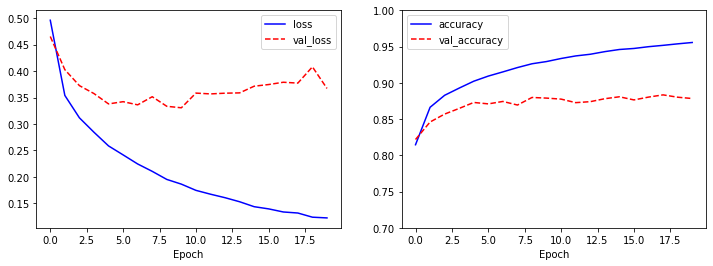

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.ylim(0.7, 1)
plt.xlabel('Epoch')
plt.legend()

plt.show()